In [1]:
# !pip install numpy==1.18.5
# !pip install scikit-learn==0.22.2.post1
# !pip install pandas==1.1.0
# !pip install Matplotlib==3.2.1
# !pip install Seaborn==0.10.1
# !pip install MLFlow==1.10.0

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve, confusion_matrix
from sklearn.model_selection import KFold
import mlflow
import mlflow.sklearn
print("Numpy: {}".format(np.__version__))
print("Pandas: {}".format(pd.__version__))
print("matplotlib: {}".format(matplotlib.__version__))
print("seaborn: {}".format(sns.__version__))
print("Scikit-Learn: {}".format(sklearn.__version__))
print("MLFlow: {}".format(mlflow.__version__))

Numpy: 1.18.5
Pandas: 1.1.0
matplotlib: 3.2.1
seaborn: 0.10.1
Scikit-Learn: 0.22.2.post1
MLFlow: 1.10.0


In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df = df.drop('Time', axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [6]:
normal = df[df.Class == 0].sample(frac=0.5, random_state=2020).reset_index(drop=True)
anomaly = df[df.Class == 1]

In [7]:
print(f'Normal: {normal.shape}')
print(f'Anomaly: {anomaly.shape}')

Normal: (142158, 30)
Anomaly: (492, 30)


In [8]:
normal_train, normal_test = train_test_split(normal, test_size=0.2, random_state=2020)
anomaly_train, anomaly_test = train_test_split(anomaly, test_size=0.2, random_state=2020)
normal_train, normal_validate = train_test_split(normal_train, test_size=0.25, random_state=2020)
anomaly_train, anomaly_validate = train_test_split(anomaly_train, test_size=0.25, random_state=2020)

In [9]:
x_train = pd.concat((normal_train, anomaly_train))
x_test = pd.concat((normal_test, anomaly_test))
x_validate = pd.concat((normal_validate, anomaly_validate))

y_train = np.array(x_train['Class'])
y_test = np.array(x_test['Class'])
y_validate = np.array(x_validate['Class'])

x_train = x_train.drop('Class', axis=1)
x_test = x_test.drop('Class', axis=1)
x_validate = x_validate.drop('Class', axis=1)

In [10]:
print(f'x_train: {x_train.shape}\ny_train: {y_train.shape}')
print('-'*15)
print(f'x_test: {x_test.shape}\ny_test: {y_test.shape}')
print('-'*15)
print(f'x_validate: {x_validate.shape}\ny_validate: {y_validate.shape}')

x_train: (85588, 29)
y_train: (85588,)
---------------
x_test: (28531, 29)
y_test: (28531,)
---------------
x_validate: (28531, 29)
y_validate: (28531,)


In [11]:
scaler = StandardScaler()
scaler.fit(pd.concat((normal, anomaly)).drop('Class',axis=1))
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_validate = scaler.transform(x_validate)

In [18]:
def train(sk_model, x_train, y_train):
    sk_model = sk_model.fit(x_train, y_train)
    train_acc = sk_model.score(x_train, y_train)
    mlflow.log_metric('train_acc', train_acc)
    print(f'Training Accuracy: {train_acc:.3%}')

In [19]:
def evaluate(sk_model, x_test, y_test):
    eval_acc = sk_model.score(x_test, y_test)
    preds = sk_model.predict(x_test)
    auc_score = roc_auc_score(y_test, preds)
    mlflow.log_metric('eval_acc', eval_acc)
    mlflow.log_metric('auc_score', auc_score)
    
    print(f'Evaluation Accuracy: {eval_acc:.3%}')
    print(f'AUC Score: {auc_score:.3%}')
    
    roc_plot = plot_roc_curve(sk_model, x_test, y_test, name='Scikit-Learn ROC Curve')
    plt.savefig('sklearn_roc_plot.png')
    plt.show()
    plt.clf()
    
    conf_matrix = confusion_matrix(y_test, preds)
    ax = sns.heatmap(conf_matrix, annot=True, fmt='g')
    
    ax.invert_xaxis()
    ax.invert_yaxis()
    
    plt.ylabel('Actual')
    plt.xlabel('Prediction')
    plt.title("Confusion Matrix")
    plt.savefig("sklearn_conf_matrix.png")
    
    mlflow.log_artifact("sklearn_roc_plot.png")
    mlflow.log_artifact("sklearn_conf_matrix.png")

Training Accuracy: 99.893%
Evaluation Accuracy: 99.874%
AUC Score: 85.341%


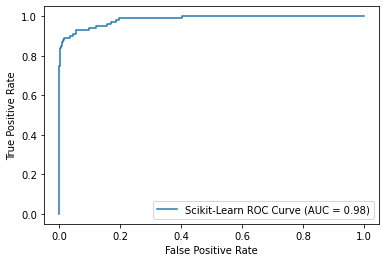

Model run:  29bf7be76e8440748a73e1a5af564659


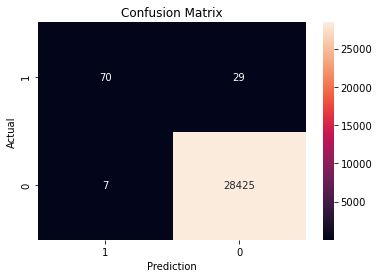

In [20]:
sk_model_lr = LogisticRegression(max_iter=400, solver='newton-cg')
mlflow.set_experiment('scikit_learn_experiment')

with mlflow.start_run():
    train(sk_model_lr, x_train, y_train)
    evaluate(sk_model_lr, x_test, y_test)
    mlflow.sklearn.log_model(sk_model_lr, 'log_reg_model')
    print('Model run: ', mlflow.active_run().info.run_uuid)
mlflow.end_run()

Training Accuracy: 100.000%
Evaluation Accuracy: 99.905%
AUC Score: 89.383%


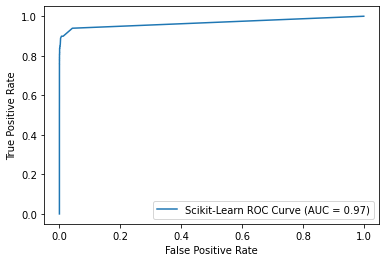

Model run:  da8e60d7c0694fcfa2ef7aac9bca8725


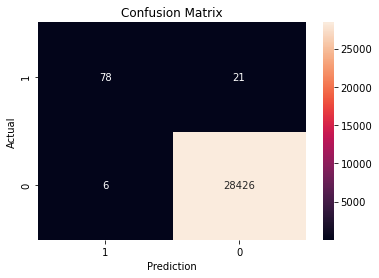

In [21]:
sk_model_rf = RandomForestClassifier()
mlflow.set_experiment('scikit_learn_experiment')

with mlflow.start_run():
    train(sk_model_rf, x_train, y_train)
    evaluate(sk_model_rf, x_test, y_test)
    mlflow.sklearn.log_model(sk_model_rf, 'random_forest_model')
    print('Model run: ', mlflow.active_run().info.run_uuid)
mlflow.end_run()

Training Accuracy: 99.917%
Evaluation Accuracy: 99.884%
AUC Score: 87.360%


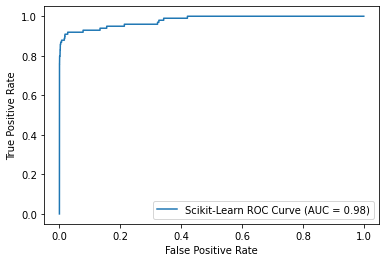

Model run:  8eafd32617164268bb82a305a90d4aa3


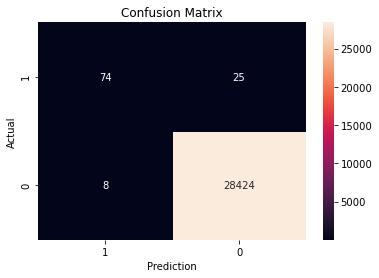

In [22]:
sk_model_ada = AdaBoostClassifier(n_estimators=100, random_state=2020)
mlflow.set_experiment('scikit_learn_experiment')

with mlflow.start_run():
    train(sk_model_ada, x_train, y_train)
    evaluate(sk_model_ada, x_test, y_test)
    mlflow.sklearn.log_model(sk_model_ada, 'ada_boost_model')
    print('Model run: ', mlflow.active_run().info.run_uuid)
mlflow.end_run()

In [56]:
import azureml
from azureml.core import Workspace

workspace_name = 'MLopsVS17'
workspace_location="East US"
resource_group = "mlflow_azure"
subscription_id = "bb8bb700-7333-4c83-ad37-7d8a84c69071"
workspace = Workspace.create(name = workspace_name,location = workspace_location,resource_group = resource_group,subscription_id = subscription_id,exist_ok=True)

C:\Users\Vishal\anaconda3\envs\MLopsAzure\lib\site-packages\urllib3\util\retry.py:440: DeprecationWarning: Using 'method_whitelist' with Retry is deprecated and will be removed in v2.0. Use 'allowed_methods' instead
  DeprecationWarning,


In [57]:
run_id = "29bf7be76e8440748a73e1a5af564659"
model_name = "log_reg_model"
model_uri = f"runs:/{run_id}/{model_name}"

In [58]:
import mlflow.azureml
model_image, azure_model = mlflow.azureml.build_image(model_uri=model_uri,workspace=workspace,model_name="sklearn_logreg_dev",image_name="model",description="SkLearn LogReg Model for Anomaly Detection",synchronous=False)

Registering model sklearn_logreg_dev


2022/03/09 00:04:07 INFO mlflow.azureml: Registered an Azure Model with name: `sklearn_logreg_dev` and version: `2`
C:\Users\Vishal\anaconda3\envs\MLopsAzure\lib\site-packages\mlflow\azureml\__init__.py:201: DeprecationWarning: ContainerImage class has been deprecated and will be removed in a future release. Please migrate to using Environments. https://docs.microsoft.com/en-us/azure/machine-learning/how-to-use-environments
  tags=tags,
C:\Users\Vishal\anaconda3\envs\MLopsAzure\lib\site-packages\azureml\core\image\container.py:161: DeprecationWarning: ContainerImageConfig class has been deprecated and will be removed in a future release. Please migrate to using Environments. https://docs.microsoft.com/en-us/azure/machine-learning/how-to-use-environments
  base_image, base_image_registry, cuda_version=cuda_version)
C:\Users\Vishal\anaconda3\envs\MLopsAzure\lib\site-packages\mlflow\azureml\__init__.py:206: DeprecationWarning: Image class has been deprecated and will be removed in a futur

Creating image


C:\Users\Vishal\anaconda3\envs\MLopsAzure\lib\site-packages\azureml\core\image\image.py:407: DeprecationWarning: Image class has been deprecated and will be removed in a future release. Please migrate to using Environments. https://docs.microsoft.com/en-us/azure/machine-learning/how-to-use-environments
  image = Image(workspace, id=image_id)
2022/03/09 00:04:23 INFO mlflow.azureml: Building an Azure Container Image with name: `model` and version: `2`


In [59]:
model_image.wait_for_creation(show_output=True)


Running.........................................................
Succeeded
Image creation operation finished for image model:2, operation "Succeeded"


In [60]:
from azureml.core.webservice import AciWebservice, Webservice
aci_service_name = 'sklearn-model-dev'
aci_service_config = AciWebservice.deploy_configuration()
aci_service = Webservice.deploy_from_image(name=aci_service_name,image=model_image,deployment_config=aci_service_config,workspace=workspace)

C:\Users\Vishal\anaconda3\envs\MLopsAzure\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: deploy_from_image has been deprecated and will be removed in a future release. Please migrate to using Environments. https://docs.microsoft.com/en-us/azure/machine-learning/how-to-use-environments
  after removing the cwd from sys.path.


In [61]:
aci_service.wait_for_deployment(show_output=True)

Tips: You can try get_logs(): https://aka.ms/debugimage#dockerlog or local deployment: https://aka.ms/debugimage#debug-locally to debug if deployment takes longer than 10 minutes.
Running
2022-03-09 00:09:51+05:30 Generating deployment configuration.
2022-03-09 00:09:51+05:30 Submitting deployment to compute.
2022-03-09 00:09:55+05:30 Checking the status of deployment sklearn-model-dev..
2022-03-09 00:12:46+05:30 Checking the status of inference endpoint sklearn-model-dev.
Succeeded
ACI service creation operation finished, operation "Succeeded"


In [62]:
aci_service.scoring_uri

'http://cd5a41fa-42d2-4988-a138-30411ea3253d.eastus.azurecontainer.io/score'

In [63]:
import pandas as pd
import mlflow
import mlflow.sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
import numpy as np
import subprocess
import json

df = pd.read_csv('creditcard.csv')
normal = df[df.Class == 0].sample(frac=0.5, random_state=2020).reset_index(drop=True)
anomaly = df[df.Class == 1]
normal_train, normal_test = train_test_split(normal, test_size = 0.2, random_state = 2020)
anomaly_train, anomaly_test = train_test_split(anomaly, test_size = 0.2, random_state = 2020)
scaler = StandardScaler()
scaler.fit(pd.concat((normal, anomaly)).drop(["Time", "Class"], axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [64]:
import requests
import json
def query(scoring_uri, inputs):
    headers = {
    "Content-Type": "application/json",
    }
    response = requests.post(scoring_uri, data=inputs, headers=headers)
    preds = json.loads(response.text)
    return preds

In [65]:
data_selection = df.iloc[:80].drop(["Time", "Class"], axis=1)
input_json = pd.DataFrame(scaler.transform(data_selection)).to_json(orient="split")
preds = query(scoring_uri=aci_service.scoring_uri, inputs=input_json)
pd.DataFrame(preds).T

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
azure_service, azure_model = mlflow.azureml.deploy(model_uri,workspace,service_name="sklearn-logreg",model_name="log-reg-model",synchronous=True)

C:\Users\Vishal\anaconda3\envs\MLopsAzure\lib\site-packages\urllib3\util\retry.py:440: DeprecationWarning: Using 'method_whitelist' with Retry is deprecated and will be removed in v2.0. Use 'allowed_methods' instead
  DeprecationWarning,


Registering model log-reg-model


2022/03/09 00:14:19 INFO mlflow.azureml: Registered an Azure Model with name: `log-reg-model` and version: `2`
2022/03/09 00:14:34 INFO mlflow.azureml: Deploying an Azure Webservice with name: `sklearn-logreg`


Tips: You can try get_logs(): https://aka.ms/debugimage#dockerlog or local deployment: https://aka.ms/debugimage#debug-locally to debug if deployment takes longer than 10 minutes.
Running
2022-03-09 00:14:26+05:30 Creating Container Registry if not exists.
2022-03-09 00:14:28+05:30 Use the existing image.
2022-03-09 00:14:28+05:30 Generating deployment configuration.
2022-03-09 00:14:30+05:30 Submitting deployment to compute..
2022-03-09 00:14:38+05:30 Checking the status of deployment sklearn-logreg..
2022-03-09 00:17:55+05:30 Checking the status of inference endpoint sklearn-logreg.
Succeeded
ACI service creation operation finished, operation "Succeeded"


In [67]:
azure_service.scoring_uri

'http://5f62350d-a6ee-47da-954d-f43abf4d9018.eastus.azurecontainer.io/score'

In [68]:
preds = query(scoring_uri=azure_service.scoring_uri, inputs=input_json)
pd.DataFrame(preds).T

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
test = pd.concat((normal.iloc[:1900], anomaly.iloc[:100]))
true = test.Class
test = scaler.transform(test.drop(["Time", "Class"], axis=1))
preds = []
batch_size = 80
for f in range(25):
    print(f"Batch {f}", end="- ")
    sample = pd.DataFrame(test[f*batch_size:(f+1)*batch_size]).to_json(orient="split")
    output = query(scoring_uri=azure_service.scoring_uri, inputs=sample)
    resp = pd.DataFrame([output])
    preds = np.concatenate((preds, resp.values[0]))
    print("Completed")
eval_acc = accuracy_score(true, preds)
eval_auc = roc_auc_score(true, preds)
print("Eval Acc", eval_acc)
print("Eval AUC", eval_auc)

Batch 0- Completed
Batch 1- Completed
Batch 2- Completed
Batch 3- Completed
Batch 4- Completed
Batch 5- Completed
Batch 6- Completed
Batch 7- Completed
Batch 8- Completed
Batch 9- Completed
Batch 10- Completed
Batch 11- Completed
Batch 12- Completed
Batch 13- Completed
Batch 14- Completed
Batch 15- Completed
Batch 16- Completed
Batch 17- Completed
Batch 18- Completed
Batch 19- Completed
Batch 20- Completed
Batch 21- Completed
Batch 22- Completed
Batch 23- Completed
Batch 24- Completed
Eval Acc 0.9915
Eval AUC 0.915


In [71]:
aci_service.delete()
azure_service.delete()